#  SVM (Support Vector Machine) 

Un SVM (Support Vector Machine) est un classificateur discriminatif formellement défini par une hyperligne de séparation.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## About the Social Network Ads

Social Network Ads : 
A categorical dataset to determine whether a user purchased a particular product

* Dataset compose of 5 columns known as [User ID, Gender, Age, EstimatedSalary and Purchased] and 400 rows.

## Load Data From CSV file

In [2]:
df = pd.read_csv('/Users/isslamkhatir/Downloads/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
df.shape

(400, 5)

In [5]:
df.size

2000

In [6]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
# Statistical review of the numerical features
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
# Check how many rows contain missing data:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Distribution of the classes

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

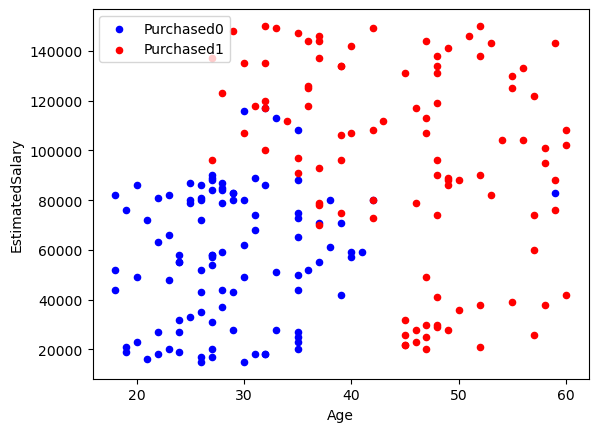

In [10]:
Purchased0_df = df[df['Purchased']== 0][0:100]
Purchased1_df = df[df['Purchased']== 1][0:100]

axes = Purchased0_df.plot(kind = 'scatter', x = 'Age', y = 'EstimatedSalary',
                          color = 'blue', label = 'Purchased0')
Purchased1_df.plot(kind = 'scatter', x = 'Age', y = 'EstimatedSalary',
                          color = 'red', label = 'Purchased1', ax = axes)


## Identifying unwanted rows

In [11]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [12]:
df = df[pd.to_numeric(df['Gender'], errors = 'coerce').notnull()]
df['Gender'] = df['Gender'].astype('int')
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

## Remove unwanted columns

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
# Perform one-hot encoding
df = pd.read_csv('/Users/isslamkhatir/Downloads/Social_Network_Ads.csv')
df_encoded = pd.get_dummies(df, columns=['Gender'])
df_encoded

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [17]:
feature_df = df_encoded[['Age', 'EstimatedSalary','Gender_Female','Gender_Male']]

# Independent variable
x = np.asarray(feature_df)

#Dependent variable
y = np.asarray(df_encoded['Purchased'])

x[0:5]

array([[   19, 19000,     0,     1],
       [   35, 20000,     0,     1],
       [   26, 43000,     1,     0],
       [   27, 57000,     1,     0],
       [   19, 76000,     0,     1]])

In [18]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Divide the data as Train/Test dataset

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled.head()

,0,1,2,3
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [21]:
#df(100) ---> Train(x,y)(80rows) /Test (x,y)(20rows) 
# x itself is a 2D array and y is 1D

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state=42)
                                                    
x_train.shape, x_test.shape

((320, 4), (80, 4))

## Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as :

    1 - Linear 
    2 - Polynomial
    3 - Radial basis function (RBF) 
    4 - Sigmoid 
Each of these functions hat its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [31]:
from sklearn import svm

'''
Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
current default is 'auto' which uses (1/n_features),
if " gamma = 'scale' " is passed then it uses 1 / (n_features * x.var())
as value of gamma.
'''

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C= 1 )
classifier.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [32]:
y_predict = classifier.predict(x_test)

## Evaluation (Results)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

